### This notebook tracks the spread of the novel coronavirus, also known as SARS-CoV-2. It is a contagious respiratory virus that first started in Wuhan in December 2019. On 2/11/2020,the disease is officially named COVID-19 by the World Health Organization.

# Exaploratory Data Analysis Begginer

In [97]:
import pandas as pd
df = pd.read_csv("covid_19_data .csv")
print(df.shape)

(11341, 8)


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
# droping duplicate value along entire datastet
df.drop_duplicates(inplace =True,keep = "first")

In [100]:
df.columns = ["sno","firstupdate","state","country","lastupdate","confirmed","deaths","recovered"]
df[["confirmed","deaths","recovered"]] = df[["confirmed","deaths","recovered"]].astype(int)

In [101]:
### Let's see how many days recoreds this dataser has 
print("Starting From : ",df.lastupdate.min())
print("Till Now      : ",df.lastupdate.max())
print("This dataset as Approx 80 days of record world wide")

Starting From :  1/22/2020 17:00
Till Now      :  2020-03-23 23:23:20
This dataset as Approx 80 days of record world wide


sno               0
firstupdate       0
state          3595
country           0
lastupdate        0
confirmed         0
deaths            0
recovered         0
dtype: int64
State feature has 3595 missing values


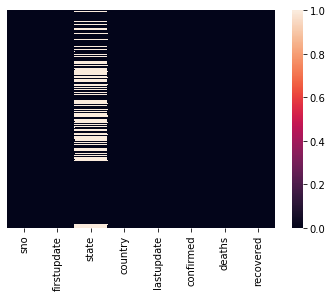

In [102]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),yticklabels = False)
print("State feature has 3595 missing values")

In [103]:
df.country = [i.lower() for i in df.country]
#df.country.unique()
df.country = df.country.replace("mainland china","china")

In [104]:
df.state.fillna("unknown",inplace = True,axis = 0)


##### Let's see which country got highest death rate

In [105]:
#df.head()

In [106]:
max_death_per_country = pd.DataFrame(df.groupby("country")["deaths"].max())
top_ten_death_rates = max_death_per_country.sort_values(by = "deaths",ascending = False).head(10)
top_ten_death_rates

,deaths
country,
italy,6077
china,3153
spain,2311
iran,1812
france,860
uk,335
netherlands,213
germany,123
switzerland,120


#### 1.insight : "Italy got highest death rates as compared to other countries" ,pause and think the cause behind highest death rates in Italy, 
##### Stay_Safe

Text(0, 0.5, 'Top ten countries')

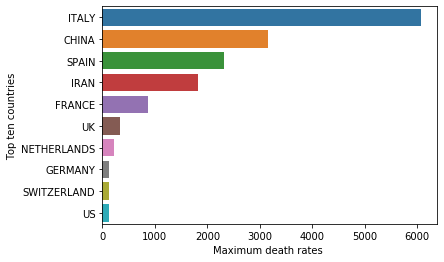

In [107]:
#lets visualize it graphically 
countries = ["ITALY","CHINA","SPAIN","IRAN","FRANCE","UK","NETHERLANDS","GERMANY","SWITZERLAND","US"]
sns.barplot(top_ten_death_rates["deaths"],countries,orient = "h",alpha = 1)
plt.xlabel("Maximum death rates ")
plt.ylabel("Top ten countries")

##### lets see which country got highest confirmed cases  ?

In [108]:
max_confirmedcases_per_country = pd.DataFrame(df.groupby("country")["confirmed"].max())
top_ten_confirmed_countries = max_confirmedcases_per_country.sort_values(by = "confirmed",ascending = False).head(10)
top_ten_confirmed_countries

,confirmed
country,
china,67800
italy,63927
spain,35136
germany,29056
iran,23049
france,19874
us,15793
south korea,8961
switzerland,8795


##### 2.insight "China got highest confirmed cases compared  to other countries"

Text(0, 0.5, 'Top ten countries')

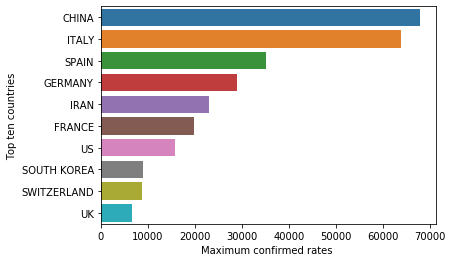

In [109]:
#lets visualize it graphically 
countries = ["CHINA","ITALY","SPAIN","GERMANY","IRAN","FRANCE","US","SOUTH KOREA","SWITZERLAND","UK"]
sns.barplot(top_ten_confirmed_countries["confirmed"],countries,orient = "h",alpha = 1)
plt.xlabel("Maximum confirmed rates ")
plt.ylabel("Top ten countries")

#### let's see which country got highest recovery rate  ?

In [110]:
max_recovered_per_country = pd.DataFrame(df.groupby("country")["recovered"].max())
top_ten_recovered_countries = max_recovered_per_country.sort_values(by = "recovered",ascending = False).head(10)
top_ten_recovered_countries

,recovered
country,
china,59882
iran,8376
italy,7432
spain,3355
south korea,3166
france,2200
others,567
germany,453
belgium,401


##### that's pretty wonder china got Highest recovery rate as well as highest Confirmed Cases ! ,again pause and think that what might be the reason behind  china's highest recovery rate !  
###### Stay Safe

Text(0, 0.5, 'Top ten countries')

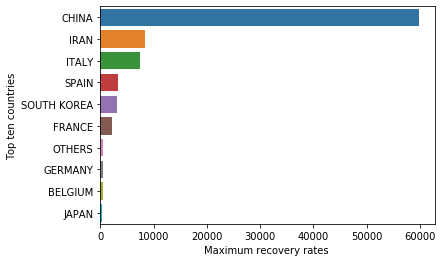

In [111]:
countries  = ["CHINA","IRAN","ITALY","SPAIN","SOUTH KOREA","FRANCE","OTHERS","GERMANY","BELGIUM","JAPAN"]
sns.barplot(top_ten_recovered_countries["recovered"],countries ,orient = "h")
plt.xlabel("Maximum recovery rates ")
plt.ylabel("Top ten countries")

## Let's analyze Confirmed case vs Death cases vs Recovery cases,  "World Wide" !!!!!
(with respect to the dataset )

In [112]:
countries_df = df.groupby('country')[['confirmed','deaths','recovered']].max().sum().reset_index()
world_wide   = pd.DataFrame(countries_df) 
world_wide.rename(columns = {"index":"Cases",0:"Counts"},inplace =True)
print("Worl wide Cases  :")
world_wide

Worl wide Cases  :


,Cases,Counts
0,confirmed,334441
1,deaths,15939
2,recovered,88294


In [113]:
# using pie chart for visualiztion of different cases

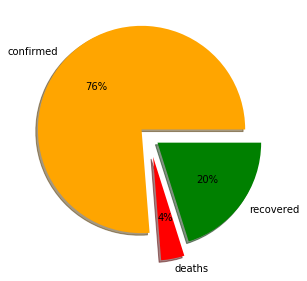

In [114]:
plt.pie(world_wide["Counts"],labels = world_wide["Cases"],shadow = True,autopct = "%0.f%%",explode = [0.1,0.2,0.1],colors = ["orange","red","Green"])
plt.tight_layout()
plt.show()


##### now let's analayze How many Active Cases are there in World Wide ....! Wondering ? Yes me too !


In [115]:
#Getting active cases 
df["activecases"] = df["confirmed"] - (df["deaths"] + df["recovered"])

In [116]:
df.head()

,sno,firstupdate,state,country,lastupdate,confirmed,deaths,recovered,activecases
0,1,01/22/2020,Anhui,china,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,china,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,china,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,china,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,china,1/22/2020 17:00,0,0,0,0


In [117]:
world_wide_active_cases = df.groupby(["country"])["activecases"].max().sum()
print("Total Number of world_wide_active_cases are :",world_wide_active_cases)
world_wide_active_case = pd.Series(world_wide_active_cases)

Total Number of world_wide_active_cases are : 278874


##### let's Understand Visually

In [118]:
world_wide = world_wide.append({"Cases":"active","Counts":278874},ignore_index = True)

####   3  insight :  Still we have 39% of active cases world wide  
###### that's a serious issue !
again please stay Safe

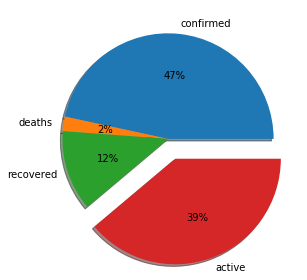

In [119]:
plt.pie(world_wide["Counts"],labels = world_wide["Cases"],shadow = True,autopct = "%0.f%%",explode = [0,0,0,0.2])
plt.tight_layout()
plt.show()

## Enough with worldwide   let's analyze our country  "  INDIA "

In [120]:
idf = df[df["country"]=="india"].iloc[:,:]
idf.shape

(54, 9)

In [121]:
idf.head()
idf[["confirmed","deaths","recovered","activecases"]] = idf[["confirmed","deaths","recovered","activecases"]].astype(int)

In [122]:
tot_deaths  = idf.deaths.max()
tot_confirm = idf.confirmed.max()
tot_recover = idf.recovered.max()
tot_active  = idf.activecases.max()
print("Total deaths    in india :",tot_deaths)
print("Total confirmed in india :",tot_confirm)
print("Total recovered in india :",tot_recover)
print("Total active    in india :",tot_active)

Total deaths    in india : 10
Total confirmed in india : 499
Total recovered in india : 34
Total active    in india : 455


# let's visual Using Bar Graph

#### 4.insight  : India has 455 active cases !!!! , 
please stay in home ,be  safe and  let other's to live safely :)

Text(0, 0.5, 'Number of People')

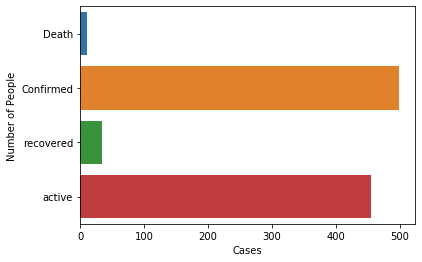

In [123]:
sns.barplot([10,499,34,455],["Death","Confirmed","recovered","active"],orient = "h")
plt.xlabel("Cases")
plt.ylabel("Number of People")

## Thank You ,To Be continued !